In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

In [5]:
sales_df = pd.read_csv('pcsg_cust_orders_export.csv', 
                        low_memory=False,
                        parse_dates=['Paid at', 'Fulfilled at', 'Created at'])

In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20853 entries, 0 to 20852
Data columns (total 71 columns):
Name                           20853 non-null object
Email                          17134 non-null object
Financial Status               9464 non-null object
Paid at                        8967 non-null datetime64[ns]
Fulfillment Status             9464 non-null object
Fulfilled at                   9426 non-null datetime64[ns]
Accepts Marketing              9464 non-null object
Currency                       9464 non-null object
Subtotal                       9464 non-null float64
Shipping                       9464 non-null float64
Taxes                          9464 non-null float64
Total                          9464 non-null float64
Discount Code                  1891 non-null object
Discount Amount                9464 non-null float64
Shipping Method                4340 non-null object
Created at                     20853 non-null datetime64[ns]
Lineitem quantity          

In [10]:
# Create a period column based on the "Paid at" timestamp
# (Perhaps consider using "Created at" column in the future?
# (For analysis using "created at" column, the "Email" and "Name" blanks
#    need to be filled forward)
# This ensures full (correct) $ amount of each transaction is analysed
sales_df['PaidAtPeriod'] = sales_df['Paid at'].apply(lambda x: x.strftime('%Y-%m') if not pd.isnull(x) else '')
sales_df['CreatedAtPeriod'] = sales_df['Created at'].apply(lambda x: x.strftime('%Y-%m') if not pd.isnull(x) else '')
sales_df.head()

,Name,Email,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 2 Value,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,PaidAtPeriod,CreatedAtPeriod
0,191569910468,c_chien_may@hotmail.com,paid,2017-09-28 05:33:13,unfulfilled,NaT,no,SGD,45.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09,2017-09
1,191569914-1221,trymeepoh@hotmail.com,paid,2017-09-28 05:32:17,fulfilled,2017-09-28 05:32:17,yes,SGD,128.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09,2017-09
2,191569914-1221,trymeepoh@hotmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2017-09
3,191569914-1221,trymeepoh@hotmail.com,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2017-09
4,191569914-1220,lxy_cheryl@hotmail.com,paid,2017-09-28 04:44:29,fulfilled,2017-09-28 04:44:29,yes,SGD,38.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09,2017-09


In [33]:
'''
1. Determine the user's cohort group (based on their first order)
2. Create a new column called CohortGroup, which is the year and month in which 
    the user's first purchase occurred.
3. Note that the "index" (i.e. UserID) is replaced with "Email" in this analysis
    because it is the closest thing to a UserID in this dataframe.
'''
#set_index function should only be run once! Comment out after running
# sales_df.set_index('Email', inplace = True)
sales_df['CohortGroup'] = \
        sales_df.groupby(level=0)['Paid at'].min(). \
        apply(lambda x: x.strftime('%Y-%m') if not pd.isnull(x) else '')
sales_df.reset_index(inplace=True)
sales_df.head()

,Email,Name,Financial Status,Paid at,Fulfillment Status,Fulfilled at,Accepts Marketing,Currency,Subtotal,Shipping,...,Tax 3 Name,Tax 3 Value,Tax 4 Name,Tax 4 Value,Tax 5 Name,Tax 5 Value,Phone,PaidAtPeriod,CreatedAtPeriod,CohortGroup
0,c_chien_may@hotmail.com,191569910468,paid,2017-09-28 05:33:13,unfulfilled,NaT,no,SGD,45.0,5.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09,2017-09,2017-09
1,trymeepoh@hotmail.com,191569914-1221,paid,2017-09-28 05:32:17,fulfilled,2017-09-28 05:32:17,yes,SGD,128.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09,2017-09,2017-02
2,trymeepoh@hotmail.com,191569914-1221,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2017-09,2017-02
3,trymeepoh@hotmail.com,191569914-1221,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,2017-09,2017-02
4,lxy_cheryl@hotmail.com,191569914-1220,paid,2017-09-28 04:44:29,fulfilled,2017-09-28 04:44:29,yes,SGD,38.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-09,2017-09,2017-09


In [40]:
sales_cohort = sales_df.groupby(['CohortGroup', 'PaidAtPeriod'])
cohorts = sales_cohort.agg({'Email': pd.Series.nunique,
                            'Name': pd.Series.nunique,
                            'Total': np.sum})
cohorts.rename(columns={'Email': 'TotalUsers',
                        'Name': 'TotalOrders',
                        'Total': 'TotalRevenue'}, 
               inplace=True)
# note that as PaidAtPeriod is used, blanks correspond to the subsequent lines
# of the same transaction, (mostly) with zero value. The TotalRevenue column
# should still be displaying the correct amount
cohorts.tail(15)

TotalUsers  TotalOrders  TotalRevenue
CohortGroup PaidAtPeriod                                       
2017-05     2017-09               25           30       3199.50
2017-06                          236          319        742.00
            2017-06              358          382      41493.00
            2017-07               38           46       4716.00
            2017-08               35           37       3437.50
            2017-09               32           35       3346.00
2017-07                          218          291        393.50
            2017-07              364          402      36720.20
            2017-08               45           51       4441.50
            2017-09               43           47       3548.50
2017-08                          187          227        233.00
            2017-08              350          376      35205.00
            2017-09               42           53       5670.00
2017-09                          166          177        210.00
            2017-09              307          330      26861.25

Now, to look at how each cohort has behaved in the months following their first purchase, so we'll need to index each cohort to their first purchase month. For example, CohortPeriod = 1 will be the cohort's first month, CohortPeriod = 2 is their second, and so on.
This allows us to compare cohorts across various stages of their lifetime.

In [41]:
def cohort_period(df):
    """
    Creates a `CohortPeriod` column, which is the Nth period based on the user's first purchase.
    
    Example
    -------
    Say you want to get the 3rd month for every user:
        df.sort(['UserId', 'OrderTime', inplace=True)
        df = df.groupby('UserId').apply(cohort_period)
        df[df.CohortPeriod == 3]
    """
    df['CohortPeriod'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

TotalUsers  TotalOrders  TotalRevenue  CohortPeriod
CohortGroup PaidAtPeriod                                                     
                                  46           50        2588.0             1
2016-10                            1           12          84.0             1
            2016-10                1            4         150.5             2
            2016-11                1            1           5.5             3
            2017-03                1            1         191.0             4

test data points from the original DataFrame with their corresponding values in the new cohorts DataFrame to make sure all our data transformations worked as expected. As long as none of these raise an exception, we're good.

In [44]:
# just to check out what's contained in the dataframe
'''
cohorts_2 = cohorts.groupby(level=0)
for key, item in cohorts_2:
    print(cohorts_2.get_group(key), '\n\n')
'''

                          TotalUsers  TotalOrders  TotalRevenue  CohortPeriod
CohortGroup PaidAtPeriod                                                     
                                  46           50        2588.0             1 


                          TotalUsers  TotalOrders  TotalRevenue  CohortPeriod
CohortGroup PaidAtPeriod                                                     
2016-10                            1           12         84.00             1
            2016-10                1            4        150.50             2
            2016-11                1            1          5.50             3
            2017-03                1            1        191.00             4
            2017-04                1            2        930.00             5
            2017-07                1            1          0.15             6 


                          TotalUsers  TotalOrders  TotalRevenue  CohortPeriod
CohortGroup PaidAtPeriod                                  

In [68]:
'''
Now, look at the percentage change of each CohortGroup over time -- 
    not the absolute change.

To do this, we'll first need to create a pandas Series containing 
    each CohortGroup and its size.
'''
# reindex the DataFrame
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

# create a Series holding the total size of each CohortGroup
cohort_group_size = cohorts['TotalUsers'].groupby(level=0).first()
cohort_group_size.drop("", inplace=True, axis=0)
cohort_group_size

CohortGroup
2016-10      1
2016-11      2
2016-12    495
2017-01    409
2017-02    269
2017-03    260
2017-04    208
2017-05    188
2017-06    236
2017-07    218
2017-08    187
2017-09    166
Name: TotalUsers, dtype: int64

In [48]:
'''
Now, we'll need to divide the TotalUsers values in cohorts by 
cohort_group_size. Since DataFrame operations are performed based 
on the indices of the objects, we'll use unstack on our cohorts 
DataFrame to create a matrix where each column represents a 
CohortGroup and each row is the CohortPeriod corresponding 
to that group.
'''
cohorts['TotalUsers'].unstack(0).head(10)

CohortGroup,,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
CohortPeriod,,,,,,,,,,,,,
1,46.0,1.0,2.0,495.0,409.0,269.0,260.0,208.0,188.0,236.0,218.0,187.0,166.0
2,NaN,1.0,NaN,632.0,541.0,371.0,379.0,317.0,292.0,358.0,364.0,350.0,307.0
3,NaN,1.0,NaN,87.0,92.0,45.0,31.0,34.0,30.0,38.0,45.0,42.0,NaN
4,NaN,1.0,NaN,115.0,75.0,44.0,35.0,45.0,25.0,35.0,43.0,NaN,NaN
5,NaN,1.0,NaN,113.0,74.0,47.0,44.0,40.0,22.0,32.0,NaN,NaN,NaN
6,NaN,1.0,NaN,92.0,78.0,46.0,47.0,40.0,25.0,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,92.0,73.0,39.0,42.0,27.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,110.0,68.0,50.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,91.0,69.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
cohorts_unstacked = cohorts['TotalUsers'].unstack(0).head(10)
cohorts_unstacked_nonblank = cohorts_unstacked.drop(cohorts_unstacked.columns[0], axis=1)
cohorts_unstacked_nonblank

CohortGroup,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
CohortPeriod,,,,,,,,,,,,
1,1.0,2.0,495.0,409.0,269.0,260.0,208.0,188.0,236.0,218.0,187.0,166.0
2,1.0,NaN,632.0,541.0,371.0,379.0,317.0,292.0,358.0,364.0,350.0,307.0
3,1.0,NaN,87.0,92.0,45.0,31.0,34.0,30.0,38.0,45.0,42.0,NaN
4,1.0,NaN,115.0,75.0,44.0,35.0,45.0,25.0,35.0,43.0,NaN,NaN
5,1.0,NaN,113.0,74.0,47.0,44.0,40.0,22.0,32.0,NaN,NaN,NaN
6,1.0,NaN,92.0,78.0,46.0,47.0,40.0,25.0,NaN,NaN,NaN,NaN
7,NaN,NaN,92.0,73.0,39.0,42.0,27.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,110.0,68.0,50.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,91.0,69.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
'''
Now, use *broadcasting* to divide each column by the 
corresponding cohort_group_size.

The resulting DataFrame, user_retention, contains the percentage 
of users from the cohort purchasing within the given period. 
For instance, 38.4% of users in the 2009-03 purchased again in month 3 
(which would be May 2009).
'''
user_retention = cohorts_unstacked_nonblank.divide(cohort_group_size, axis=1)
user_retention.head(10)

CohortGroup,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09
CohortPeriod,,,,,,,,,,,,
1,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,1.0,NaN,1.276768,1.322738,1.379182,1.457692,1.524038,1.553191,1.516949,1.669725,1.871658,1.849398
3,1.0,NaN,0.175758,0.224939,0.167286,0.119231,0.163462,0.159574,0.161017,0.206422,0.224599,NaN
4,1.0,NaN,0.232323,0.183374,0.163569,0.134615,0.216346,0.132979,0.148305,0.197248,NaN,NaN
5,1.0,NaN,0.228283,0.180929,0.174721,0.169231,0.192308,0.117021,0.135593,NaN,NaN,NaN
6,1.0,NaN,0.185859,0.190709,0.171004,0.180769,0.192308,0.132979,NaN,NaN,NaN,NaN
7,NaN,NaN,0.185859,0.178484,0.144981,0.161538,0.129808,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.222222,0.166259,0.185874,0.130769,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,0.183838,0.168704,0.141264,NaN,NaN,NaN,NaN,NaN,NaN,NaN


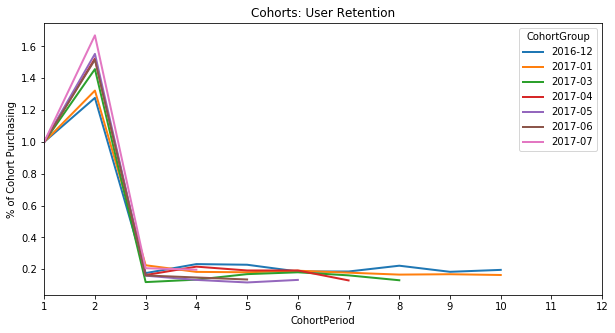

In [77]:
user_retention[['2016-12', '2017-01', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07' ]].plot(figsize = (10, 5))
# ['2016-10', '2016-11', '2016-12', '2017-01', '2017-02']
plt.title('Cohorts: User Retention')
plt.xticks(np.arange(1,12.1, 1))
plt.xlim(1,12)
plt.ylabel('% of Cohort Purchasing');

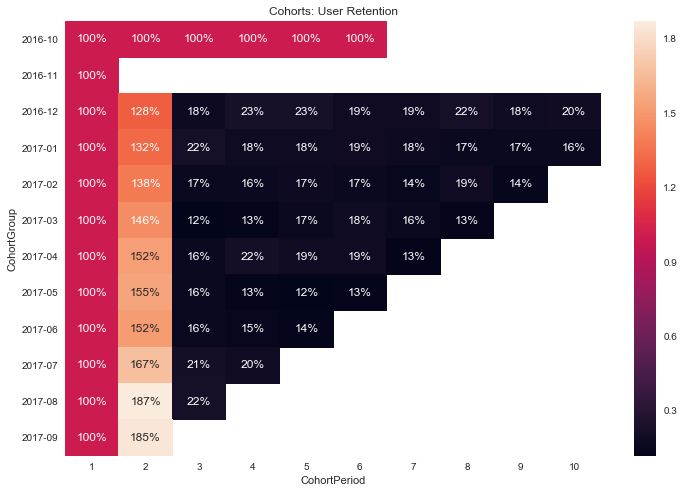

In [78]:
import seaborn as sns
sns.set(style='white')

plt.figure(figsize=(12, 8))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');